In [109]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [110]:

df = pd.read_excel('ipca_202207SerieHist-pre-processado.xls')

df = df.dropna(how='all')

df

,ANO,MES,INDICE,VARIACAO-MES,VARIACAO-3,VARIACAO-6,VARIACAO-ANO,VARIACAO-12
1,1994.0,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
2,NaN,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
3,NaN,MAR,282.96,42.75,182.96,602.93,182.96,3417.39
4,NaN,ABR,403.73,42.68,185.71,648.92,303.73,3828.49
5,NaN,MAI,581.49,44.03,193.36,695.71,481.49,4331.19
...,...,...,...,...,...,...,...,...
368,NaN,ABR,6382.88,1.06,3.73,6.05,4.29,12.13
369,NaN,MAI,6412.88,0.47,3.18,5.55,4.78,11.73
370,NaN,JUN,6455.85,0.67,2.22,5.49,5.49,11.89
371,NaN,JUL,6411.95,-0.68,0.46,4.21,4.77,10.07


In [111]:

df = df.fillna(method="ffill")


df.describe().iloc[:, 1:2]

,INDICE
count,344.000000
mean,3068.906105
std,1508.309666
min,141.310000
25%,1705.705000
50%,2799.345000
75%,4317.070000
max,6455.850000


In [112]:
df.isnull().sum()
df

,ANO,MES,INDICE,VARIACAO-MES,VARIACAO-3,VARIACAO-6,VARIACAO-ANO,VARIACAO-12
1,1994.0,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
2,1994.0,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
3,1994.0,MAR,282.96,42.75,182.96,602.93,182.96,3417.39
4,1994.0,ABR,403.73,42.68,185.71,648.92,303.73,3828.49
5,1994.0,MAI,581.49,44.03,193.36,695.71,481.49,4331.19
...,...,...,...,...,...,...,...,...
368,2022.0,ABR,6382.88,1.06,3.73,6.05,4.29,12.13
369,2022.0,MAI,6412.88,0.47,3.18,5.55,4.78,11.73
370,2022.0,JUN,6455.85,0.67,2.22,5.49,5.49,11.89
371,2022.0,JUL,6411.95,-0.68,0.46,4.21,4.77,10.07


In [113]:


# verificando dados ausentes


# In[10]:


# limpando colunas que não serão utilizadas
df = df.drop(columns=[
    "VARIACAO-MES",
              "VARIACAO-3",
              "VARIACAO-6",
              "VARIACAO-ANO",
              "VARIACAO-12",
    ]
)


df

,ANO,MES,INDICE
1,1994.0,JAN,141.31
2,1994.0,FEV,198.22
3,1994.0,MAR,282.96
4,1994.0,ABR,403.73
5,1994.0,MAI,581.49
...,...,...,...
368,2022.0,ABR,6382.88
369,2022.0,MAI,6412.88
370,2022.0,JUN,6455.85
371,2022.0,JUL,6411.95


In [114]:


#mudando os meses de object para date
df = df.replace(['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ'],['01-01','02-01','03-01','04-01','05-01','06-01','07-01','08-01','09-01','10-01','11-01','12-01'])




# In[13]:


#passando ano pra int
df = df.astype({"ANO":'int64'})
df = df.astype({"ANO":'string', "MES":'string'})


# In[14]:


df['DATA'] = df['ANO'].str.cat(df['MES'], sep='-')


df.index.name=None


df


,ANO,MES,INDICE,DATA
1,1994,01-01,141.31,1994-01-01
2,1994,02-01,198.22,1994-02-01
3,1994,03-01,282.96,1994-03-01
4,1994,04-01,403.73,1994-04-01
5,1994,05-01,581.49,1994-05-01
...,...,...,...,...
368,2022,04-01,6382.88,2022-04-01
369,2022,05-01,6412.88,2022-05-01
370,2022,06-01,6455.85,2022-06-01
371,2022,07-01,6411.95,2022-07-01


In [115]:
# transformando datas em indices
start = datetime.datetime.strptime("1994-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,344)]
df['index'] = date_list
df.set_index(['index'], inplace=True)
df.index.name=None

<AxesSubplot: title={'center': 'IPCA'}>

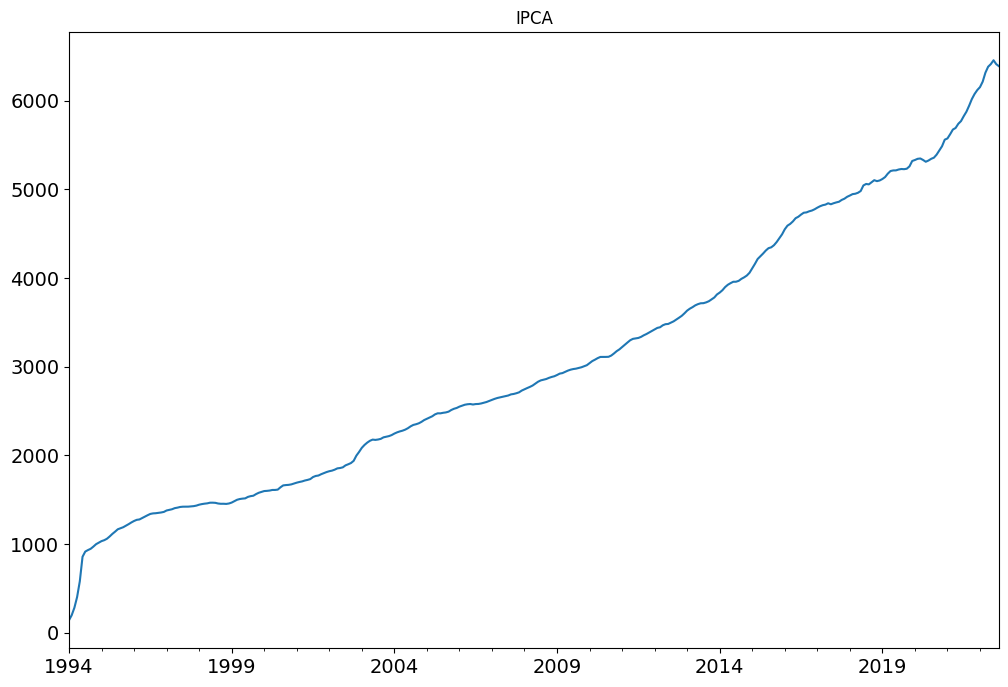

In [116]:
#gráfico do ipca durante os anos
df.INDICE.plot(figsize=(12,8), title= 'IPCA', fontsize=14)

In [117]:
df['INDICE'] = df.INDICE.apply(lambda x: int(x)*100)

<Figure size 640x480 with 0 Axes>

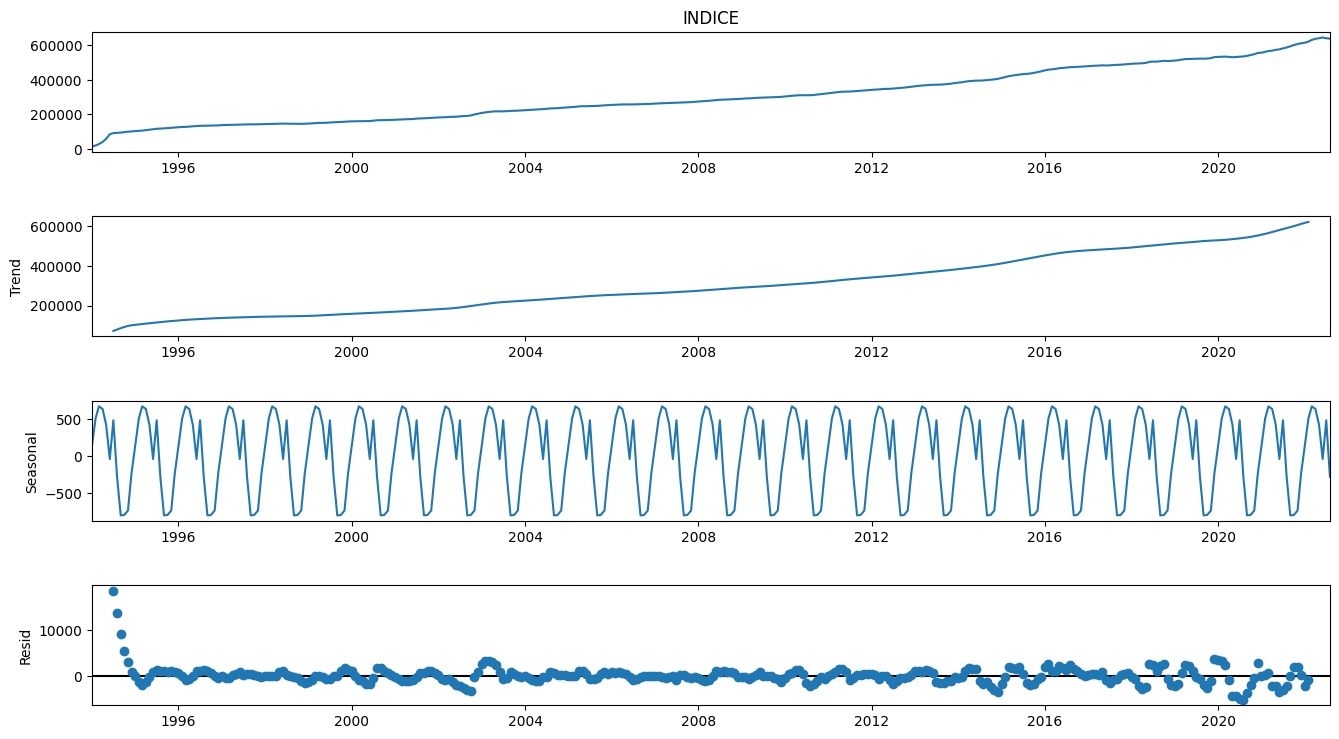

In [118]:
decomposition = seasonal_decompose(df.INDICE)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [119]:
df = df.drop(columns=[
        "ANO",
        "MES",
    ]
)


In [120]:
mod = sm.tsa.statespace.SARIMAX(df.INDICE, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print (results.summary())

C:\Users\Thalita\anaconda3\envs\env-linear\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thalita\anaconda3\envs\env-linear\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                               INDICE   No. Observations:                  344
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -2983.889
Date:                              Mon, 26 Sep 2022   AIC                           5971.779
Time:                                      08:34:21   BIC                           5979.383
Sample:                                  01-01-1994   HQIC                          5974.812
                                       - 08-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.6855      0.029    -23.901      0.000      -0.742      -0.629
sigma2      4.155e+

<AxesSubplot: >

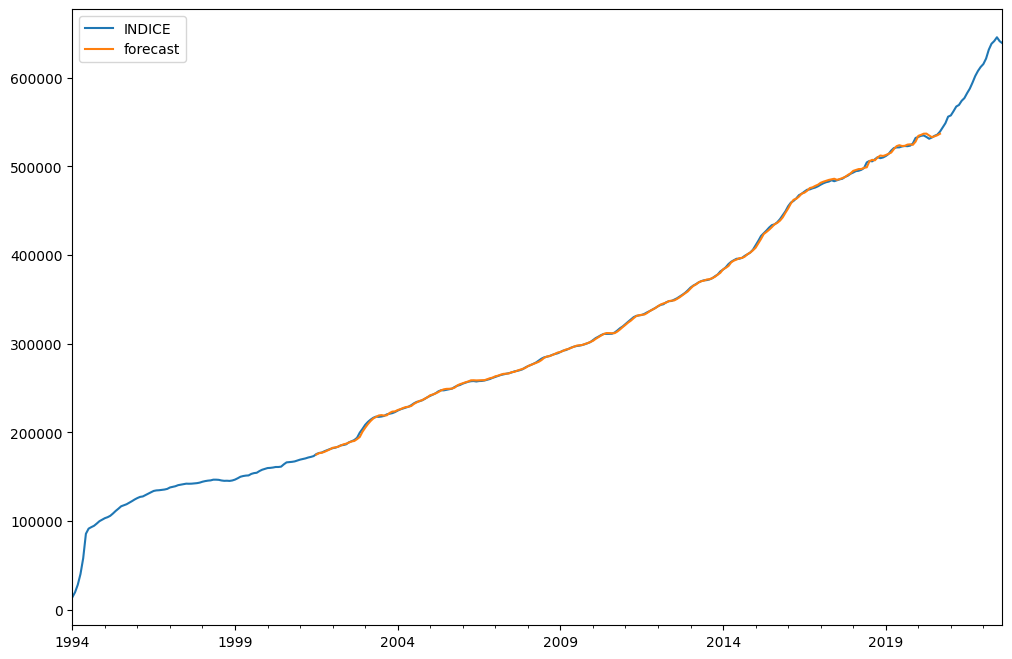

In [121]:
# ao utilizar dynamic false, o modelo utiliza o ultimo valor previsto para prever o próximo
df['forecast'] = results.predict(start = 90, end= 320, dynamic= False)  
df[['INDICE', 'forecast']].plot(figsize=(12, 8)) 

In [122]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred = results.predict(start = 90, end= 320, dynamic= True)
test = df.INDICE.iloc[90:321]

rmse = sqrt(mean_squared_error(test, pred))
print('RMSE: %.3f' %rmse)

RMSE: 64477.361


In [123]:
start = datetime.datetime.strptime("2022-09-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= df.columns)
df = pd.concat([df, future])

<AxesSubplot: >

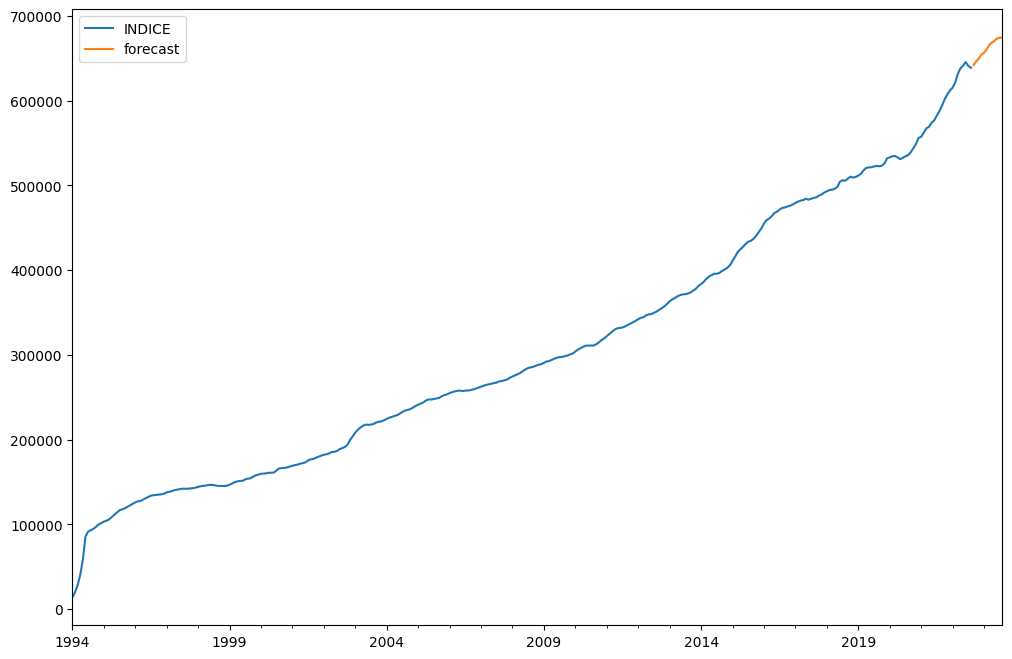

In [124]:
df['forecast'] = results.predict(start = 344, end = 356, dynamic= True)  
df[['INDICE', 'forecast']].plot(figsize=(12, 8)) 


In [125]:
f = df.iloc[342:356]

In [126]:
f.forecast.tail(12)

2022-09-01    642150.400451
2022-10-01    646256.673868
2022-11-01    649773.575982
2022-12-01    654315.054753
2023-01-01    656573.062700
2023-02-01    660511.360196
2023-03-01    665605.455864
2023-04-01    668520.024051
2023-05-01    670721.582267
2023-06-01    673497.428847
2023-07-01    674034.989134
2023-08-01    674801.980570
Name: forecast, dtype: float64

In [127]:
df.tail(12)

,INDICE,DATA,forecast
2022-09-01,NaN,<NA>,642150.400451
2022-10-01,NaN,<NA>,646256.673868
2022-11-01,NaN,<NA>,649773.575982
2022-12-01,NaN,<NA>,654315.054753
2023-01-01,NaN,<NA>,656573.062700
2023-02-01,NaN,<NA>,660511.360196
2023-03-01,NaN,<NA>,665605.455864
2023-04-01,NaN,<NA>,668520.024051
2023-05-01,NaN,<NA>,670721.582267
2023-06-01,NaN,<NA>,673497.428847
